**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [446]:
df = pd.read_csv("../data/train.csv", dtype={'MSSubClass':object}, index_col=0)

In [447]:
corr_matrix = df.corr()
mask_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

In [448]:
mask_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [449]:
df.drop(['PoolQC', 'MiscFeature', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 
                'Fence', 'Alley'], axis=1, inplace= True)

In [451]:
df['Bathrooms'] = df['FullBath'] + df['HalfBath']
df['PorchSF'] = df['EnclosedPorch'] + df['OpenPorchSF']

In [452]:
df_nums = df.select_dtypes(include=['float64', 'int64'])

In [453]:
pd.options.mode.chained_assignment = None

In [454]:
df_nums = df_nums.fillna(df_nums.median())

In [455]:
df_cats = df.select_dtypes(['object'])

In [456]:
df_cats = df_cats.fillna(df_cats.mode())

In [458]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 29 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

#### PoolQC, MiscFeature, Fence, and Alley were dropped because they contain less than 20% non-null values. FullBath and HalfBath were consolidated into one feature, Bathrooms. EnclosedPorch and OpenPorchSF were consolidated into one feature, PorchSF. PoolArea, MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, LowQualFinSF, YrSold, and OverallCond were dropped because they had low Pearson/Spearman correlation scores scores.


### B. Plot histograms of the numeric columns. 

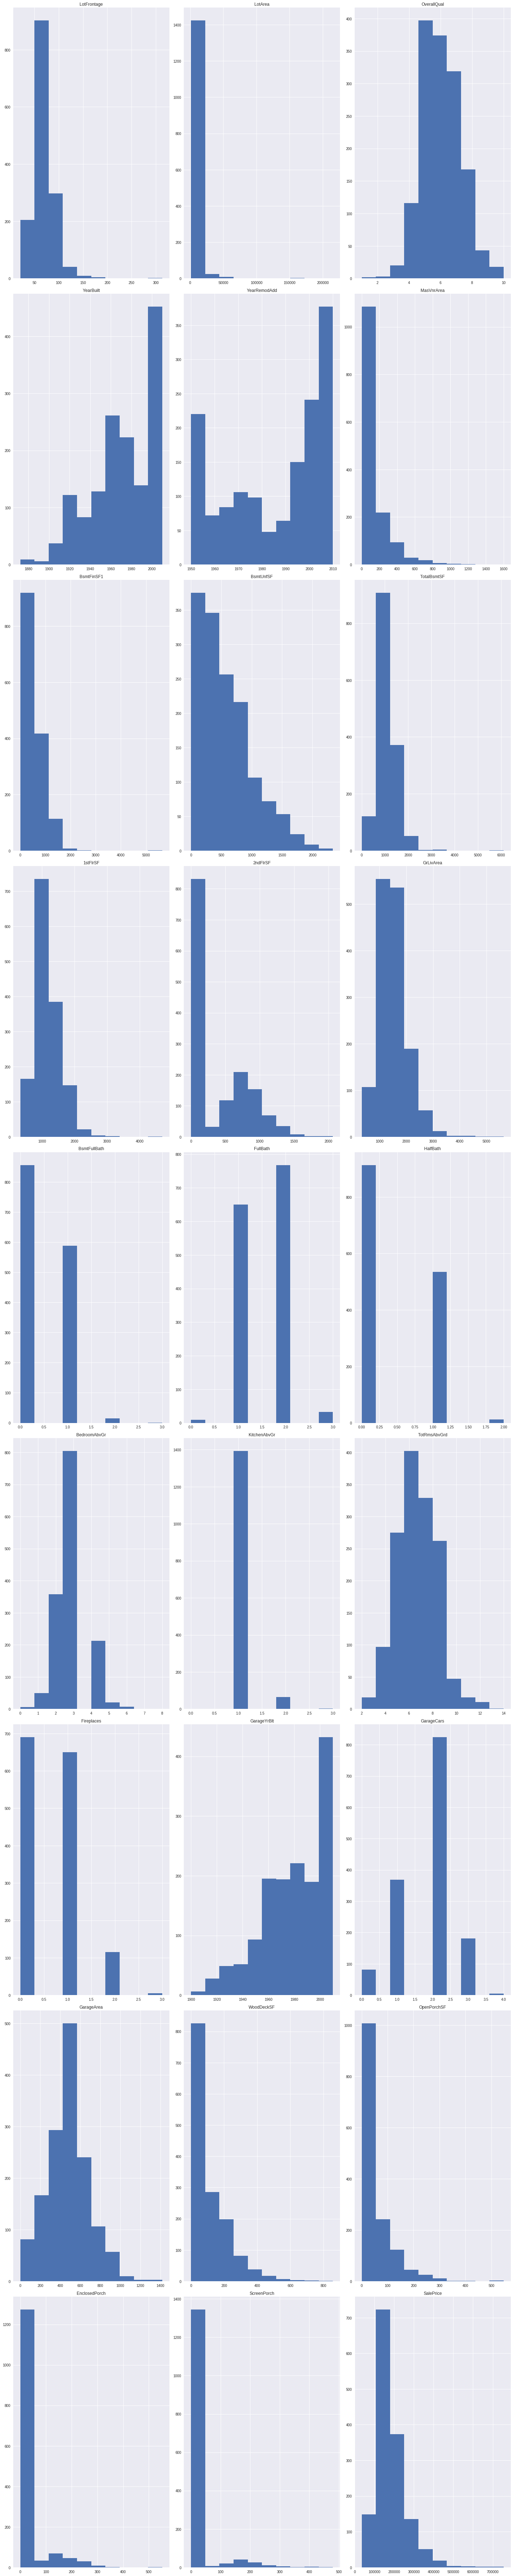

In [459]:
def hist_plots(df = df_nums, rows=9, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df[label[i]].hist(ax=ax)
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()
#     fig.show()
hist_plots()

#### What are your observations? Add them to this markdown cell.

Some features such as 3SsnPorch, ScreenPorch, PoolArea, MiscVal, LowQualFinSF, LotArea have little variation. 

Most home sale prices were between 100,000 & 200,000 dollars.

The majority of houses had garages that could hold 6 cars. 

Most houses sold had no fireplace.

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

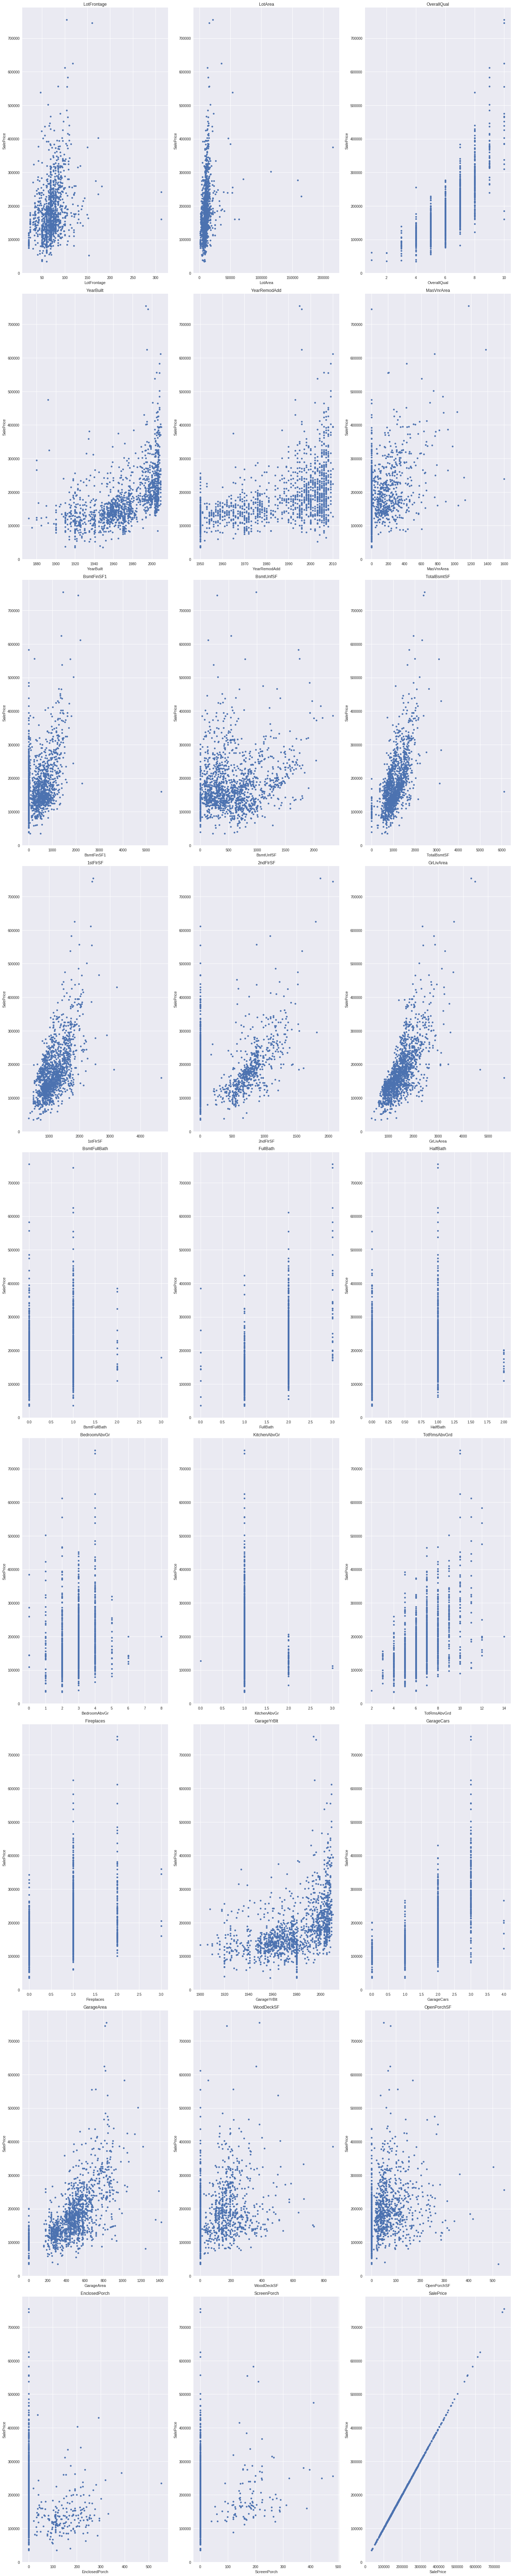

In [253]:
def scatter_plots(df = df_nums, rows=9, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df.plot(x=label[i], y = 'SalePrice', kind = 'scatter', ax=ax)
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()
#     fig.show()
scatter_plots()

#### What are your observations? Add them to this markdown cell.

Garage Area is correlated with a higher sale price. 

Total basement square footage is correlated with a higher sale price. 

GrLivArea is correlated with a higher sale price. 

Garage Cars is correlated with a higher sale price. 

---



### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

df_cats['NewColumnName'] = some_list_same_length as # of rows in the df

In [731]:
cat_cols = df.select_dtypes(['object']).columns
num_cols = df.select_dtypes(exclude = ['object']).columns

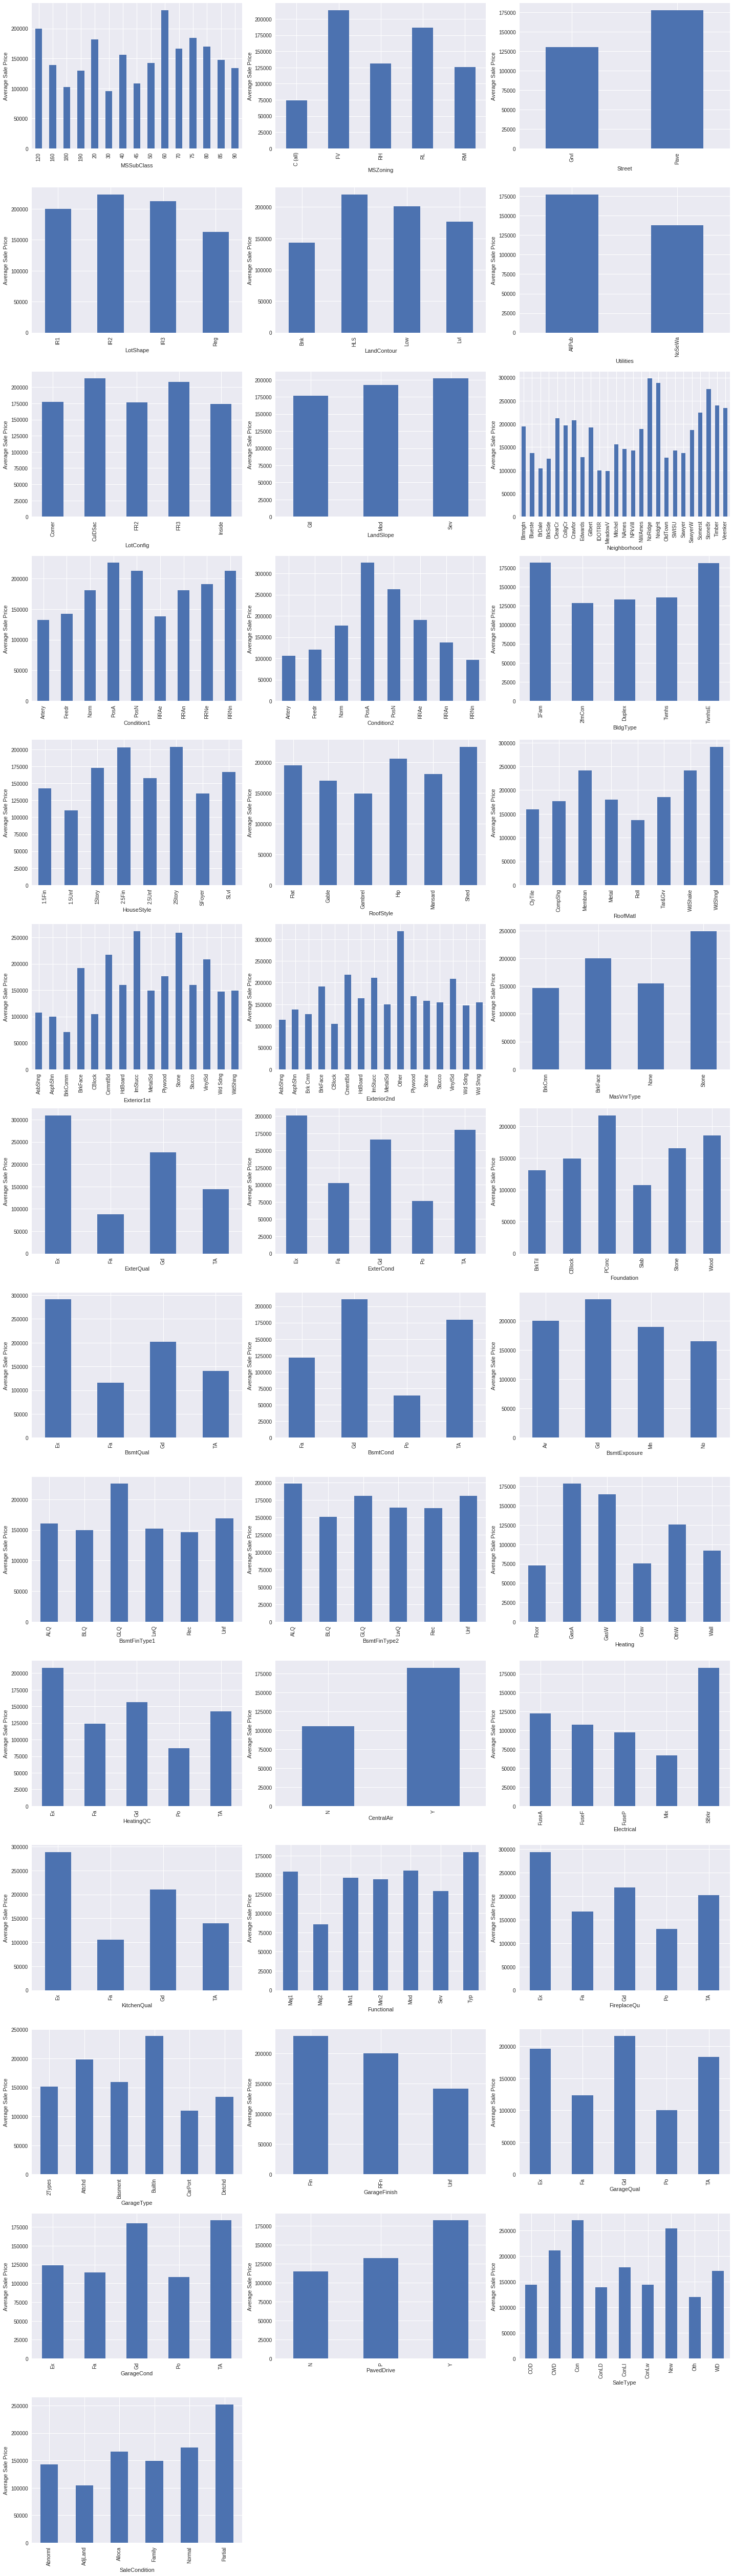

In [737]:
fig = plt.figure(figsize = (20,70))

for i, col in enumerate(cat_cols):
    fig.add_subplot(14,3,1+i)
    df.groupby(col).mean()['SalePrice'].plot.bar()
    plt.xlabel(col)
    plt.ylabel('Average Sale Price')
plt.tight_layout()


In [ ]:
sns.countplot(x='SalePrice', data=df)

#### What are your observations? Add them to this markdown cell.

Houses with excellent kitchen quality got higher average sale prices.

Houses with central air got higher average sale prices.

Houses on paved streets got higher average sale prices as opposed to gravel.

Floating Village Residential and Residential Low Density got higher average sale prices.

---



## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

The outlier is a value that may be much smaller or larger than other values in the data set. Tukey's method assumes that the means of values being compared are from the same population, which is the case with SalePrice. Only 61 values out of 1460 are considered outliers in the data set according to Tukey's method so I am not sure if 1.5 times the interquartile should be decreased to account for more outliers. 

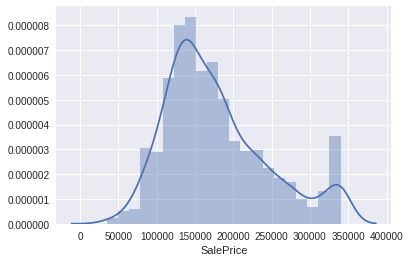

In [530]:
sns.distplot(df_nums.SalePrice)

In [405]:
Q1 = df_nums['SalePrice'].quantile(0.25)
Q3 = df_nums['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

In [406]:
Q1, Q3, IQR

(129975.0, 214000.0, 84025.0)

In [407]:
Q3 + 1.5 * IQR

340037.5

In [485]:
mask_high = (df_nums['SalePrice'] >= (Q3 + 1.5 * IQR))

In [503]:
mask_low = (df_nums['SalePrice'] <= (Q3 + 1.5 * IQR))

In [507]:
df_nums.SalePrice[mask_high] = (Q3 + 1.5 * IQR)

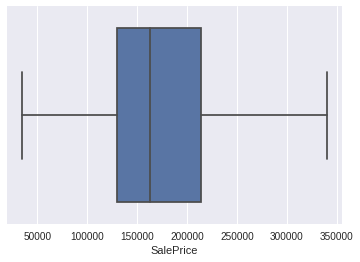

In [509]:
sns.boxplot(df_nums.SalePrice)

In [510]:
df_nums.SalePrice.count()

1460

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

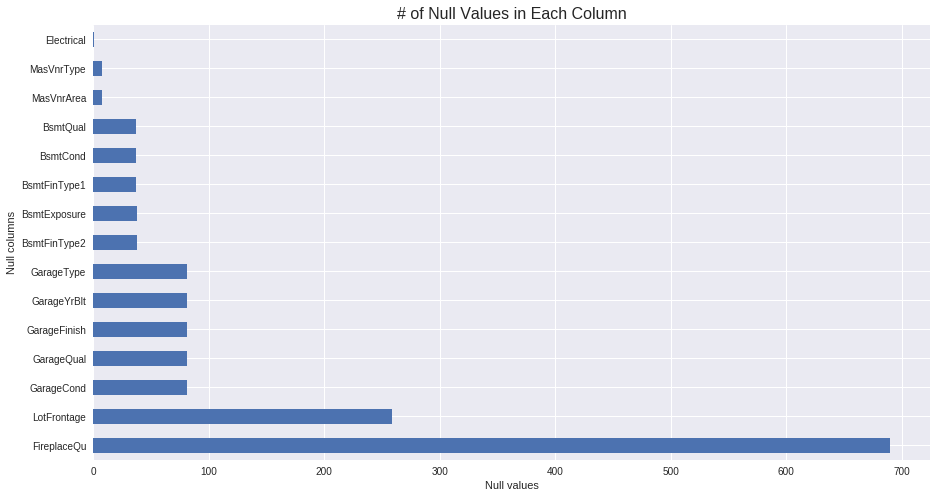

In [750]:
fig = plt.figure(figsize = (15, 8))
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False).plot.barh()
plt.xlabel('Null values')
plt.ylabel('Null columns')
plt.title('# of Null Values in Each Column', fontsize=16)
plt.show()

Verify that you have *truly* eliminated all the null values!

In [845]:
combined_df.isnull().sum()[combined_df.isnull().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [511]:
df_dummy = pd.get_dummies(df_cats)

In [835]:
df_dummy.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [513]:
combined_df = pd.concat([df_nums, df_dummy], axis=1)

In [514]:
combined_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [515]:
del combined_df['SalePrice']

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [517]:
from sklearn.model_selection import train_test_split

In [518]:
target = df_nums.SalePrice

In [519]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(combined_df,
                                                    target,
                                                    test_size = .3,
                                                    random_state = seed)

In [520]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1022, 282)
(438, 282)
(1022,)
(438,)


In [521]:
X_train.mean()

LotFrontage                 70.119374
LotArea                  10745.437378
OverallQual                  6.128180
YearBuilt                 1970.995108
YearRemodAdd              1984.757339
MasVnrArea                 104.952055
BsmtFinSF1                 446.176125
BsmtUnfSF                  571.223092
TotalBsmtSF               1059.768102
1stFlrSF                  1169.737769
2ndFlrSF                   353.738748
GrLivArea                 1529.242661
BsmtFullBath                 0.422701
FullBath                     1.582192
HalfBath                     0.374755
BedroomAbvGr                 2.890411
KitchenAbvGr                 1.045010
TotRmsAbvGrd                 6.545010
Fireplaces                   0.613503
GarageYrBlt               1978.746575
GarageCars                   1.783757
GarageArea                 477.120352
WoodDeckSF                  97.548924
OpenPorchSF                 49.525440
EnclosedPorch               21.303327
ScreenPorch                 15.565558
Bathrooms   

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't do much good with predicting new data. By conducting tests, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [522]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [523]:
print(X_train.mean(), X_train.std())

print(X_test.mean(), X_test.std())

LotFrontage                 70.119374
LotArea                  10745.437378
OverallQual                  6.128180
YearBuilt                 1970.995108
YearRemodAdd              1984.757339
MasVnrArea                 104.952055
BsmtFinSF1                 446.176125
BsmtUnfSF                  571.223092
TotalBsmtSF               1059.768102
1stFlrSF                  1169.737769
2ndFlrSF                   353.738748
GrLivArea                 1529.242661
BsmtFullBath                 0.422701
FullBath                     1.582192
HalfBath                     0.374755
BedroomAbvGr                 2.890411
KitchenAbvGr                 1.045010
TotRmsAbvGrd                 6.545010
Fireplaces                   0.613503
GarageYrBlt               1978.746575
GarageCars                   1.783757
GarageArea                 477.120352
WoodDeckSF                  97.548924
OpenPorchSF                 49.525440
EnclosedPorch               21.303327
ScreenPorch                 15.565558
Bathrooms   

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [524]:
from sklearn.linear_model import LinearRegression


In [525]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [554]:
results_train = ols.score(X_train, y_train)
results_train

0.93931848606906054

In [527]:
results_test =ols.score(X_test, y_test)
results_test

0.89267525915657464

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [540]:
example_results = list(results_train)
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [533]:
example_results

[{'combined_df': 'train',
  'first': 'test1',
  'preprocessing': 'raw',
  'score': '1 bajillion'},
 {'combined_df': 'train',
  'preprocessing': 'scaled',
  'score': '20 bajillion',
  'second': 'test1'}]

In [536]:
pd.DataFrame(example_results)

,combined_df,first,preprocessing,score,second
0,train,test1,raw,1 bajillion,NaN
1,train,NaN,scaled,20 bajillion,test1


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [694]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [695]:
benchmark_raw = LinearRegression()

In [696]:
benchmark_scaled = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [697]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [698]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.939318
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.892675


#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [699]:
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_scaled.score(X_train_scaled, y_train)
scaled_test_score = benchmark_scaled.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [700]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.393185e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.926753e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.393185e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.879275e+19


#### What are your observations? Add them to this markdown cell.

My scaled test performs much worst than my raw test. 

My scaled training is identical to my raw training. 

---


### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [701]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [702]:
ridge = Ridge().fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_train_score})
results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_test_score})

In [703]:
ridge = Ridge().fit(X_train_scaled, y_train)
ridge_train_score_scaled = ridge.score(X_train_scaled, y_train)
ridge_test_score_scaled = ridge.score(X_test_scaled, y_test)

results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_train_score_scaled})
results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_test_score_scaled})

In [704]:
lasso = Lasso().fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_train_score})
results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [705]:
lasso = Lasso().fit(X_train_scaled, y_train)
lasso_train_score_scaled = lasso.score(X_train_scaled, y_train)
lasso_test_score_scaled = lasso.score(X_test_scaled, y_test)

results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_train_score_scaled})
results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_test_score_scaled})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [706]:
enet = ElasticNet().fit(X_train, y_train)

enet_train_score = enet.score(X_train, y_train)
enet_test_score = enet.score(X_test, y_test)

results.append({'name':'ElasticNet',
                'model':enet,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': enet_train_score})
results.append({'name':'ElasticNet',
                'model':enet,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': enet_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [711]:
enet = ElasticNet().fit(X_train_scaled, y_train)

enet_train_score_scaled = enet.score(X_train_scaled, y_train)
enet_test_score_scaled = enet.score(X_test_scaled, y_test)

results.append({'name':'ElasticNet',
                'model':enet,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': enet_train_score_scaled})
results.append({'name':'ElasticNet',
                'model':enet,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': enet_test_score_scaled})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [712]:
results_df = pd.DataFrame(results)

In [713]:
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.393185e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.926753e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.393185e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.879275e+19
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.301784e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.950743e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,9.393079e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.992880e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.392782e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.028268e-01


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [718]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.892675
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.895074
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.902827
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.883027


#### What are your observations? Add them to this markdown cell.

Lasso regularization performs better on my raw test data than my benchmark.

ElasticNet performs worst on my raw test data than my benchmark. 

Ridge performs nearly identically to my benchmark on raw test data. 

---



#### Display just the scaled test results

In [719]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.879275e+19
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.992880e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,8.991316e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,8.985155e-01


#### What are your observations? Add them to this markdown cell.

Scaling my benchmark completely throws my predictions out of whack. This might be due to outliers and/or just the number of features.

The ridge, lasso, and elasticnet scores on the training and test sets are very close together so I’m probably underfitting.

---



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [715]:
results_df[results_df.name == 'benchmark']

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.393185e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.926753e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.393185e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.879275e+19


#### Display just the Ridge models

In [720]:
results_df[results_df.name == 'Ridge']

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.930178
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.895074
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,0.939308
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,0.899288


#### Display just the Elasticnet models

In [717]:
results_df[results_df.name == 'ElasticNet']

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.841673
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.883027
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,0.919298
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,0.898515


#### Display just the Lasso models

In [721]:
results_df[results_df.name == 'Lasso']

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.939278
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.902827
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.939318
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.899132


In [751]:
results_df.sort_values(by='score', ascending = False)

,dataset,model,name,preprocessing,score
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.393185e-01
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.393185e-01
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,9.393178e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,9.393079e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.392782e-01
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.301784e-01
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,9.192982e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.028268e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.992880e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,8.991316e-01


#### What are your observations? Add them to this markdown cell.

Raw test scores perform better than scaled test scores. 

Train scores perform much better than test scores. 

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [ ]:
# def func
# name
# raw or scaled
# model = model.fit
# model_score = model.score
# raw or scale
# x-test y test
# results list

In [803]:
cv_results = list()

In [804]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [805]:
alphas = np.logspace(-2,4,7)

In [806]:
ridge_cv = RidgeCV(alphas, cv=5)

ridge_cv.fit(X_train, y_train)
ridge_train_score_cv = ridge_cv.score(X_train, y_train)
ridge_test_score_cv = ridge_cv.score(X_test, y_test)

cv_results.append({'name':'ElasticNet',
                'model':ridge_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_train_score_cv})
cv_results.append({'name':'ElasticNet',
                'model':ridge_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_test_score_cv})

In [807]:
ridge_cv = RidgeCV(alphas, cv=5)

ridge_cv.fit(X_train_scaled, y_train)
ridge_train_score_cv_scaled = ridge_cv.score(X_train_scaled, y_train)
ridge_test_score_cv_scaled = ridge_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'ElasticNet',
                'model':ridge_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_train_score_cv_scaled})
cv_results.append({'name':'ElasticNet',
                'model':ridge_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_test_score_cv_scaled})

In [808]:
lasso_cv = LassoCV(alphas = alphas, cv=5)

lasso_cv.fit(X_train, y_train)
lasso_train_score_cv = lasso_cv.score(X_train, y_train)
lasso_test_score_cv = lasso_cv.score(X_test, y_test)

cv_results.append({'name':'ElasticNet',
                'model':lasso_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_train_score_cv})
cv_results.append({'name':'ElasticNet',
                'model':lasso_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_test_score_cv})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [809]:
lasso_cv = LassoCV(alphas = alphas, cv=5)

lasso_cv.fit(X_train_scaled, y_train)
lasso_train_score_cv_scaled = lasso_cv.score(X_train_scaled, y_train)
lasso_test_score_cv_scaled = lasso_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'ElasticNet',
                'model':lasso_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_train_score_cv_scaled})
cv_results.append({'name':'ElasticNet',
                'model':lasso_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_test_score_cv_scaled})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [810]:
enet_cv = ElasticNetCV(alphas =alphas, cv=5)

enet_cv.fit(X_train, y_train)
enet_train_score_cv = enet_cv.score(X_train, y_train)
enet_test_score_cv = enet_cv.score(X_test, y_test)

cv_results.append({'name':'ElasticNet',
                'model':enet_cv,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': enet_train_score_cv})
cv_results.append({'name':'ElasticNet',
                'model':enet_cv,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': enet_test_score_cv})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [811]:
enet_cv = ElasticNetCV(alphas = alphas, cv=5)

enet_cv.fit(X_train_scaled, y_train)

enet_train_score_cv_scaled = enet_cv.score(X_train_scaled, y_train)
enet_test_score_cv_scaled = enet_cv.score(X_test_scaled, y_test)

cv_results.append({'name':'ElasticNet',
                'model':enet_cv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': enet_train_score_cv_scaled})
cv_results.append({'name':'ElasticNet',
                'model':enet_cv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': enet_test_score_cv_scaled})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### Display just the raw test results

In [812]:
cv_results_df = pd.DataFrame(cv_results)

In [813]:
cv_results_df[(cv_results_df.preprocessing == 'raw')]

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,raw,0.914135
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,raw,0.895500
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,raw,0.919751
5,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,raw,0.908586
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNet,raw,0.919376
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNet,raw,0.894518


#### Display just the scaled test results

In [814]:
cv_results_df[(cv_results_df.preprocessing == 'scaled')]

,dataset,model,name,preprocessing,score
2,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,scaled,0.902984
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,scaled,0.891182
6,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,scaled,0.918233
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",ElasticNet,scaled,0.907737
10,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNet,scaled,0.919298
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNet,scaled,0.898515


In [816]:
results_df.sort_values(by='score', ascending = False)

,dataset,model,name,preprocessing,score
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.393185e-01
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.393185e-01
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,9.393178e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,9.393079e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.392782e-01
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.301784e-01
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,9.192982e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.028268e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.992880e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,8.991316e-01


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

1. Lasso
2. Ridge
3. ElasticNet

In [752]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [821]:
ridge_test_preds = ridge_scaled.predict(X_test_scaled)

In [825]:
lasso_test_preds = lasso.predict(X_test_scaled)

In [828]:
ElasticNet_test_preds = enet.predict(X_test_scaled)

In [850]:
print('ElasticNet MAE:', mean_absolute_error(ElasticNet_test_preds, y_test))
print('Ridge MAE:', mean_absolute_error(ridge_test_preds, y_test))
print('Lasso MAE:', mean_absolute_error(lasso_test_preds, y_test))

ElasticNet MAE: 15671.59405
Ridge MAE: 15713.8288356
Lasso MAE: 754719.122318


In [714]:
from sklearn import metrics

rmse = {}

#rmse for lin reg (bench)

benchmark_scaled.fit(X_train, y_train)
y_pred = benchmark_raw.predict(X_test_scaled)
rmse['Linear Regression']=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#rmse for ridge

y_pred_ridge = ridge.predict(X_test_scaled)
rmse['Ridge']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

#rmse for lasso

y_pred_lasso = lasso.predict(X_test_scaled)
rmse['Lasso']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

#rmse for ElasticNet

y_pred_enet = enet.predict(X_test_scaled)
rmse['ElasticNet']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet))

rmse

{'ElasticNet': 21777.610451623863,
 'Lasso': 766887.17487630702,
 'Linear Regression': 846247.10138406197,
 'Ridge': 21694.56607231385}

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Because the data set includes lots of features and regularizing it helps with the overfitting problem that arises as a result by lowering the beta values. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [830]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

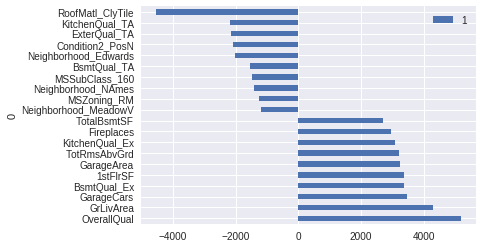

In [832]:
plot_coef(ridge_cv)

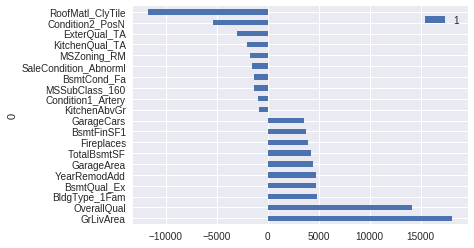

In [833]:
plot_coef(lasso_cv)

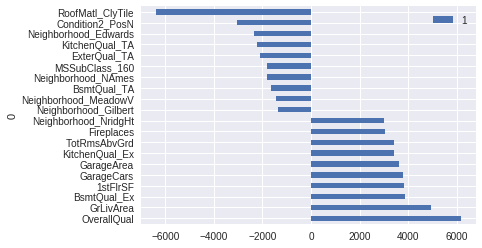

In [834]:
plot_coef(enet_cv)

#### Which features add / take away most value from a home?

#### Features that add the most value to a home

1- OverallQual 
<brc>
2- GrLivArea
<brc>
3- BsmtQual_ex
<brc>
4- GarageCars

#### Features that take away the most value from a home

1- RoofMatl_ClyTile
<brc>
2- Condition2_PosN
<brc>
3- ExterQual_TA
<brc>
4- KitchenQual_TA

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)